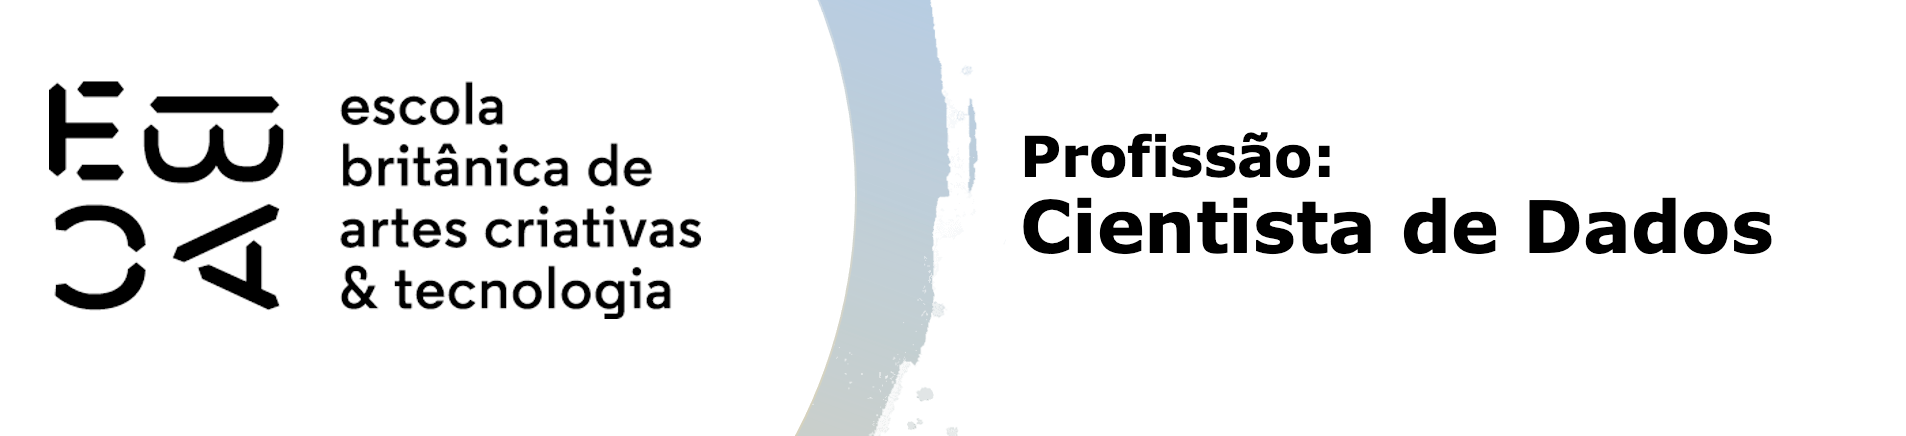

# Regressão III - Tarefa

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [11]:
df.isna().sum()

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [13]:
# Selecionando apenas colunas numéricas
cols_numericas = df.select_dtypes(include='number').columns

# Substituindo missing pela média
df[cols_numericas] = df[cols_numericas].fillna(df[cols_numericas].mean())

In [15]:
df.isna().sum()

index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

Foi realizada a verificação de valores faltantes no conjunto de dados.
Conforme especificado no enunciado do exercício, os valores ausentes das variáveis numéricas foram substituídos pela média de cada variável, uma vez que neste momento da análise não iremos nos aprofundar em técnicas mais sofisticadas de imputação.

----

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [18]:
df.index = pd.to_datetime(df.index)

In [22]:
# Identificando a última data da base
ultima_data = df.index.max()

# Definindo o ponto de corte: últimos 3 meses
data_corte = ultima_data - pd.DateOffset(months=3)

ultima_data, data_corte

(Timestamp('2016-03-01 00:00:00'), Timestamp('2015-12-01 00:00:00'))

In [24]:
# Base de treino: tudo antes do período de teste
df_treino = df[df.index < data_corte]

# Base de teste (holdout): últimos 3 meses
df_teste = df[df.index >= data_corte]

In [26]:
df_treino.index.min(), df_treino.index.max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2015-11-01 00:00:00'))

In [28]:
df_teste.index.min(), df_teste.index.max()

(Timestamp('2015-12-01 00:00:00'), Timestamp('2016-03-01 00:00:00'))

In [30]:
df_treino.shape, df_teste.shape

((550000, 13), (200000, 13))

Após a separação temporal, a base de treino ficou composta por 550.000 observações, enquanto a base holdout contém 200.000 observações, ambas com 13 variáveis.
Essa divisão garante volume suficiente para estimação dos parâmetros e uma avaliação consistente fora da amostra.

----

### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [34]:
y = df_treino['renda']

In [36]:
X = df_treino.drop(columns=['renda'])

In [38]:
X = pd.get_dummies(X, drop_first=True)

In [44]:
import statsmodels.api as sm

# Variável resposta
y = df_treino['renda']

# Variáveis explicativas
X = df_treino.drop(columns=['renda'])

# Dummies
X = pd.get_dummies(X, drop_first=True)

# Garantir tipo numérico
X = X.astype(float)

# Tratar possíveis NaN
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Constante
X = sm.add_constant(X)

# Modelo
modelo_1 = sm.OLS(y, X).fit()

# Resultado
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     7403.
Date:                Tue, 20 Jan 2026   Prob (F-statistic):               0.00
Time:                        17:50:10   Log-Likelihood:            -7.0524e+06
No. Observations:              550000   AIC:                         1.410e+07
Df Residuals:                  549974   BIC:                         1.411e+07
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -4.613e+04   4878.107     -9.456      0.000   -5.57e+04   -3.66e+04
index                             0.0960      0.025      3.785      0.000       0.046       0.146
qtd_filhos                     -944.4327   2297.925     -0.411      0.681   -5448.294    3559.428
idade                           358.5351     15.853     22.617      0.000     327.464     389.606
tempo_emprego                  8217.7815     21.307    385.692      0.000    8176.021    8259.542
qt_pessoas_residencia          -131.0261   2293.044     -0.057      0.954   -4625.319    4363.267
sexo_M                        -3132.8864    285.741    -10.964      0.000   -3692.929   -2572.844
posse_de_veiculo_S            -1304.6169    271.841     -4.799      0.000   -1837.418    -771.816
posse_de_imovel_S              7011.3571    267.096     26.250      0.000    6487.857    7534.857
tipo_renda_Bolsista           -4.207e+04   5459.877     -7.705      0.000   -5.28e+04   -3.14e+04
tipo_renda_Empresário          2552.3999    306.562      8.326      0.000    1951.548    3153.252
tipo_renda_Pensionista        -2.654e+04    437.113    -60.724      0.000   -2.74e+04   -2.57e+04
tipo_renda_Servidor público    -869.5035    451.176     -1.927      0.054   -1753.795      14.788
educacao_Médio                -4185.4936   1145.013     -3.655      0.000   -6429.683   -1941.304
educacao_Pós graduação         8225.7709   3915.748      2.101      0.036     551.029    1.59e+04
educacao_Superior completo      921.5425   1158.230      0.796      0.426   -1348.552    3191.636
educacao_Superior incompleto   5448.8075   1295.698      4.205      0.000    2909.280    7988.335
estado_civil_Separado          1155.0792   2352.690      0.491      0.623   -3456.119    5766.277
estado_civil_Solteiro          1.055e+04   2308.097      4.570      0.000    6023.684    1.51e+04
estado_civil_União             1420.7983    461.985      3.075      0.002     515.322    2326.275
estado_civil_Viúvo            -1153.5490   2378.326     -0.485      0.628   -5814.993    3507.895
tipo_residencia_Casa          -2426.2612   1043.174     -2.326      0.020   -4470.850    -381.673
tipo_residencia_Com os pais    2168.5716   1181.838      1.835      0.067    -147.793    4484.936
tipo_residencia_Comunitário    2946.4613   2106.379      1.399      0.162   -1181.975    7074.897
tipo_residencia_Estúdio       -6398.6244   1763.462     -3.628      0.000   -9854.954   -2942.295
tipo_residencia_Governamental -6453.3681   1241.262     -5.199      0.000   -8886.202   -4020.535
==============================================================================
Omnibus:                  1296061.466   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      24118672385.396
Skew

O modelo de regressão linear apresentou R² ajustado de aproximadamente 25%, indicando capacidade moderada de explicação da variabilidade da renda. Variáveis como tempo de emprego, idade, nível educacional, tipo de renda e posse de imóvel mostraram-se estatisticamente significativas e economicamente relevantes. Apesar da não normalidade dos resíduos, o grande tamanho amostral garante validade assintótica das inferências.

----

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [47]:
import numpy as np

df['log_renda'] = np.log(df['renda'])

In [49]:
df['tempo_emprego_q'] = pd.qcut(
    df['tempo_emprego'],
    q=20,
    duplicates='drop'
)

In [51]:
perfil_tempo = (
    df
    .groupby('tempo_emprego_q')
    .agg(
        qtd_obs=('renda', 'count'),
        media_log_renda=('log_renda', 'mean'),
        media_tempo_emprego=('tempo_emprego', 'mean')
    )
    .reset_index()
)

perfil_tempo.head()

C:\Users\renna\AppData\Local\Temp\ipykernel_27960\1463712082.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('tempo_emprego_q')


,tempo_emprego_q,qtd_obs,media_log_renda,media_tempo_emprego
0,"(0.11699999999999999, 0.816]",37699,8.134693,0.515096
1,"(0.816, 1.458]",37522,8.215925,1.124770
2,"(1.458, 2.099]",37437,8.335011,1.783247
3,"(2.099, 2.912]",37391,8.390223,2.513020
4,"(2.912, 3.636]",37915,8.522387,3.300942


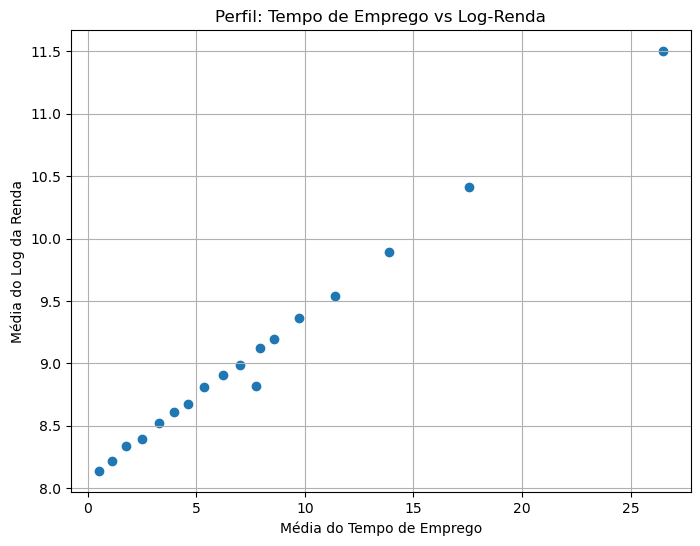

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(
    perfil_tempo['media_tempo_emprego'],
    perfil_tempo['media_log_renda']
)

plt.xlabel('Média do Tempo de Emprego')
plt.ylabel('Média do Log da Renda')
plt.title('Perfil: Tempo de Emprego vs Log-Renda')
plt.grid(True)
plt.show()

O gráfico indica uma relação positiva e aproximadamente linear entre a média do tempo de emprego e a média do log da renda. Isso sugere que a transformação logarítmica da variável resposta foi eficaz para reduzir a assimetria e tornar a relação mais linear. Não se observa uma curvatura acentuada ou mudança clara de inclinação, o que indica que modelos lineares devem apresentar bom desempenho. Ainda assim, abordagens como regressão segmentada ou LOWESS poderiam ser utilizadas como ferramentas exploratórias para verificar possíveis variações locais na inclinação da relação.

----

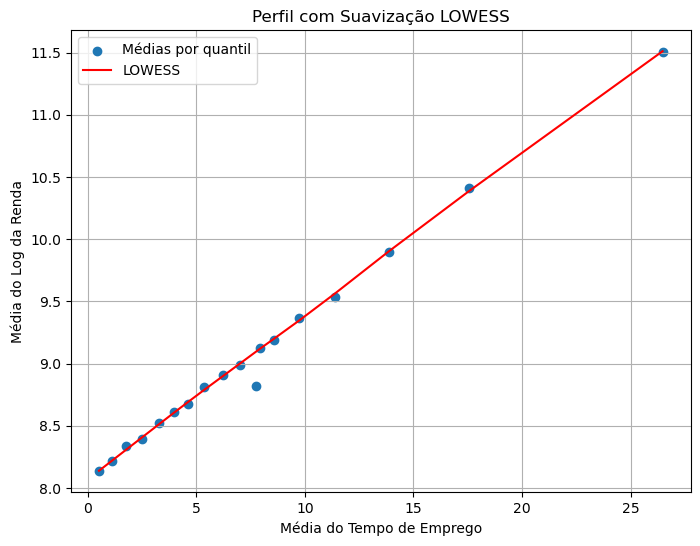

In [56]:
from statsmodels.nonparametric.smoothers_lowess import lowess

lowess_fit = lowess(
    perfil_tempo['media_log_renda'],
    perfil_tempo['media_tempo_emprego'],
    frac=0.6
)

plt.figure(figsize=(8,6))
plt.scatter(perfil_tempo['media_tempo_emprego'],
            perfil_tempo['media_log_renda'],
            label='Médias por quantil')

plt.plot(lowess_fit[:,0], lowess_fit[:,1],
         color='red', label='LOWESS')

plt.xlabel('Média do Tempo de Emprego')
plt.ylabel('Média do Log da Renda')
plt.title('Perfil com Suavização LOWESS')
plt.legend()
plt.grid(True)
plt.show()

----

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


In [94]:
# base de treino
df = df_treino.copy()

# resetar índice
df = df.reset_index(drop=True)

# transformação (linearização)
df['log_tempo_emprego'] = np.log1p(df['tempo_emprego'])

# remover colunas indevidas
df = df.drop(columns=[
    'renda',
    'tempo_emprego',
    'index'
])

# dummies
df = pd.get_dummies(df, drop_first=True)

# converter booleanos
df = df.astype(int)

# X e y alinhados
X_log = sm.add_constant(df)
y = df_treino['renda'].reset_index(drop=True)

# modelo
modelo_log = sm.OLS(y, X_log).fit()
modelo_log.rsquared_adj


0.12037162674493362

Foi testada uma transformação logarítmica da variável tempo_emprego com o objetivo de melhorar a linearidade da relação com a renda. No entanto, o R²-ajustado do modelo transformado (≈ 0,12) foi inferior ao do modelo original (≈ 0,25), indicando que a transformação não trouxe ganhos de explicação. Assim, conclui-se que a relação entre tempo de emprego e renda já é bem capturada de forma linear no modelo original.

----

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [98]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# preparar base de teste (mesmo tratamento do treino)
df_test = df_teste.copy().reset_index(drop=True)

y_test = df_test['renda']

X_test = df_test.drop(columns=['renda', 'tempo_emprego', 'index'])
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.astype(int)
X_test = sm.add_constant(X_test)

# alinhar colunas com o treino
X_test = X_test.reindex(columns=X.columns, fill_value=0)

# previsão
y_pred = modelo_1.predict(X_test)

# métricas
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

r2_test, rmse_test

(-2.3548931956229726, 51566.586260138065)

In [100]:
df_test_log = df_teste.copy().reset_index(drop=True)

df_test_log['log_tempo_emprego'] = np.log1p(df_test_log['tempo_emprego'])

y_test = df_test_log['renda']

X_test_log = df_test_log.drop(columns=['renda', 'tempo_emprego', 'index'])
X_test_log = pd.get_dummies(X_test_log, drop_first=True)
X_test_log = X_test_log.astype(int)
X_test_log = sm.add_constant(X_test_log)

# alinhar colunas
X_test_log = X_test_log.reindex(columns=X_log.columns, fill_value=0)

# previsão
y_pred_log = modelo_log.predict(X_test_log)

# métricas
r2_test_log = r2_score(y_test, y_pred_log)
rmse_test_log = np.sqrt(mean_squared_error(y_test, y_pred_log))

r2_test_log, rmse_test_log

(-1.2446664505273883, 42179.84118046658)

A avaliação dos modelos na base de testes revelou desempenho inferior ao esperado, com valores negativos de R², indicando que os modelos não generalizam bem para dados fora da amostra. O modelo com transformação logarítmica do tempo de emprego apresentou melhora relativa em relação ao modelo original, com menor RMSE e R² menos negativo, sugerindo que a linearização reduz parcialmente a perda de ajuste. Ainda assim, os resultados evidenciam forte não linearidade e alta variabilidade da variável renda, indicando a necessidade de transformações adicionais ou abordagens mais flexíveis para modelagem.

----